<a href="https://colab.research.google.com/github/daniellemsampaio/Projetos/blob/main/AED_Enade_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análise Exploratória de Dados - ENEM 2019**

*Processamento dos Dados*

In [19]:
# Importar as Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-pastel')

In [20]:
# Carregar os dados e visualização prévia
data = pd.read_csv('microdados_enade_2019.csv', sep=';',low_memory=False)
print('O dataset possui',len(data),'registros organizados em',len(data.columns),'colunas.')
data.head()

O dataset possui 433930 registros organizados em 137 colunas.


,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,ANO_FIM_EM,ANO_IN_GRAD,CO_TURNO_GRADUACAO,TP_INSCRICAO_ADM,TP_INSCRICAO,NU_ITEM_OFG,NU_ITEM_OFG_Z,NU_ITEM_OFG_X,NU_ITEM_OFG_N,NU_ITEM_OCE,NU_ITEM_OCE_Z,NU_ITEM_OCE_X,NU_ITEM_OCE_N,DS_VT_GAB_OFG_ORIG,DS_VT_GAB_OFG_FIN,DS_VT_GAB_OCE_ORIG,DS_VT_GAB_OCE_FIN,DS_VT_ESC_OFG,DS_VT_ACE_OFG,DS_VT_ESC_OCE,DS_VT_ACE_OCE,TP_PRES,TP_PR_GER,TP_PR_OB_FG,TP_PR_DI_FG,TP_PR_OB_CE,TP_PR_DI_CE,TP_SFG_D1,...,QE_I29,QE_I30,QE_I31,QE_I32,QE_I33,QE_I34,QE_I35,QE_I36,QE_I37,QE_I38,QE_I39,QE_I40,QE_I41,QE_I42,QE_I43,QE_I44,QE_I45,QE_I46,QE_I47,QE_I48,QE_I49,QE_I50,QE_I51,QE_I52,QE_I53,QE_I54,QE_I55,QE_I56,QE_I57,QE_I58,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
0,2019,1,10002,10028,5710,3,1,5103403,51,5,27,M,2010,2012.0,3.0,1,0,8,1,0,0,27,0,7,0,ZDCBCCDB,ZDCBCCDB,ABECDDEABDECCBCDEBAEDCDBAAA,ABEXDDEABDECXXXDXBAEDCXXAAA,DACBCBDD,80111010,ABEEDDDAADEAEECBBABECCACBAA,"1,11911E+26",555,555,555,555,555,555,336,...,7,1,3,5,7,7,1,1,2,6,4,1,3,6,1,1,1,1,1,2,2,6,2,1,8,1,3,2,5,6,2,5,1,1,2,5,8,7,1,2
1,2019,1,10002,10028,5710,3,1,5103403,51,5,26,M,2009,2015.0,3.0,1,0,8,1,0,0,27,0,7,0,ZDCBCCDB,ZDCBCCDB,ABECDDEABDECCBCDEBAEDCDBAAA,ABEXDDEABDECXXXDXBAEDCXXAAA,CDCBDCBC,81110100,ABCECDEBAABCCCDDDBAEDCBADDA,"1,10901E+26",555,555,555,555,555,555,555,...,2,1,3,2,3,3,1,2,1,2,3,2,1,6,1,1,1,1,2,1,2,5,3,1,2,7,2,1,4,3,1,4,2,2,2,5,4,4,2,2
2,2019,1,10002,10028,5710,3,1,5103403,51,5,23,M,2012,2016.0,3.0,1,0,8,1,0,0,27,0,7,0,ZDCBCCDB,ZDCBCCDB,ABECDDEABDECCBCDEBAEDCDBAAA,ABEXDDEABDECXXXDXBAEDCXXAAA,,,,,222,222,222,222,222,222,222,...,2,1,3,2,2,2,2,2,1,1,2,1,2,6,1,1,1,4,1,1,2,6,3,1,1,2,2,2,5,2,3,4,4,3,3,4,1,1,1,4
3,2019,1,10002,10028,5710,3,1,5103403,51,5,24,M,2013,2014.0,3.0,1,0,8,1,0,0,27,0,7,0,ZDCBCCDB,ZDCBCCDB,ABECDDEABDECCBCDEBAEDCDBAAA,ABEXDDEABDECXXXDXBAEDCXXAAA,ADCCACEB,81100101,EEEEAEDABAEADAEDACABDCCCDDC,"1,90001E+24",555,555,555,555,555,555,555,...,3,2,4,5,5,4,5,4,3,2,3,3,4,6,4,4,8,3,3,2,2,8,8,3,1,1,3,3,4,3,3,5,2,2,2,3,3,4,3,3
4,2019,1,10002,10028,5710,3,1,5103403,51,5,41,M,2012,2013.0,3.0,1,0,8,1,0,0,27,0,7,0,ZDCBCCDB,ZDCBCCDB,ABECDDEABDECCBCDEBAEDCDBAAA,ABEXDDEABDECXXXDXBAEDCXXAAA,,,,,222,222,222,222,222,222,222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Verificar os dados faltantes
pd.DataFrame({'tipos':data.dtypes, 'missing':data.isna().sum()})

,tipos,missing
NU_ANO,int64,0
CO_IES,int64,0
CO_CATEGAD,int64,0
CO_ORGACAD,int64,0
CO_GRUPO,int64,0
...,...,...
QE_I64,object,26065
QE_I65,object,26064
QE_I66,object,26067
QE_I67,object,26064


*Limpeza e Tratamento dos Dados*

In [30]:
# Eliminar colunas desnecessárias para análise do dataset
data_new = data[['CO_GRUPO','CO_MODALIDADE','CO_UF_CURSO','CO_REGIAO_CURSO','NU_IDADE',
                 'TP_SEXO','NT_GER','NT_FG','NT_CE','QE_I01','QE_I02','QE_I03','QE_I04',
                 'QE_I05','QE_I06','QE_I07','QE_I08','QE_I09','QE_I10','QE_I11','QE_I12',
                 'QE_I13','QE_I14','QE_I15','QE_I17','QE_I18','QE_I21','QE_I23']]           
print('O novo dataset possui',len(data_new),'registros organizados em',len(data_new.columns),'colunas.')
data_new.head()

O novo dataset possui 433930 registros organizados em 28 colunas.


,CO_GRUPO,CO_MODALIDADE,CO_UF_CURSO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,NT_GER,NT_FG,NT_CE,QE_I01,QE_I02,QE_I03,QE_I04,QE_I05,QE_I06,QE_I07,QE_I08,QE_I09,QE_I10,QE_I11,QE_I12,QE_I13,QE_I14,QE_I15,QE_I17,QE_I18,QE_I21,QE_I23
0,5710,1,51,5,27,M,"51,9","36,5",57,E,C,A,D,E,C,D,B,C,A,A,A,A,A,A,B,A,A,D
1,5710,1,51,5,26,M,"54,2","44,3","57,5",A,A,A,E,D,B,B,E,C,A,A,A,A,A,A,B,A,A,D
2,5710,1,51,5,23,M,NaN,NaN,NaN,A,A,A,E,E,B,D,E,B,B,A,A,A,A,D,A,A,A,B
3,5710,1,51,5,24,M,"42,1","49,9","39,5",A,D,A,F,F,B,C,E,B,A,A,A,A,A,A,B,A,A,D
4,5710,1,51,5,41,M,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,


In [31]:
# Verificar os dados faltantes do novo dataset
pd.DataFrame({'tipos':data_new.dtypes, 'missing':data_new.isna().sum()})

,tipos,missing
CO_GRUPO,int64,0
CO_MODALIDADE,int64,0
CO_UF_CURSO,int64,0
CO_REGIAO_CURSO,int64,0
NU_IDADE,int64,0
TP_SEXO,object,0
NT_GER,object,43792
NT_FG,object,43792
NT_CE,object,43792
QE_I01,object,0


In [35]:
# Remover os registros que possuem dados faltantes
data_new = data_new.dropna()
data_new.drop_duplicates()
data_new['NT_GER'].fillna('NA')
data_new['NT_FG'].fillna('NA')
data_new['NT_CE'].fillna('NA')
data_new = data_new.dropna()
print('O novo dataset possui',len(data_new),'registros organizados em',len(data_new.columns),'colunas.')
data_new.head()

O novo dataset possui 390135 registros organizados em 28 colunas.


,CO_GRUPO,CO_MODALIDADE,CO_UF_CURSO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,NT_GER,NT_FG,NT_CE,QE_I01,QE_I02,QE_I03,QE_I04,QE_I05,QE_I06,QE_I07,QE_I08,QE_I09,QE_I10,QE_I11,QE_I12,QE_I13,QE_I14,QE_I15,QE_I17,QE_I18,QE_I21,QE_I23
0,5710,1,51,5,27,M,51.9,36.5,57.0,E,C,A,D,E,C,D,B,C,A,A,A,A,A,A,B,A,A,D
1,5710,1,51,5,26,M,54.2,44.3,57.5,A,A,A,E,D,B,B,E,C,A,A,A,A,A,A,B,A,A,D
3,5710,1,51,5,24,M,42.1,49.9,39.5,A,D,A,F,F,B,C,E,B,A,A,A,A,A,A,B,A,A,D
5,5710,1,51,5,26,M,49.3,40.3,52.3,A,A,A,E,E,D,A,C,C,D,A,A,A,A,A,B,A,A,E
6,5710,1,51,5,24,M,49.6,59.6,46.2,A,A,A,E,E,B,B,E,B,A,A,A,A,A,A,B,A,A,C


In [40]:
# Tratar variáveis quantitativas e confirmar que não há mais dados faltantes no novo dataset após eliminação dos registros 
data_new['NT_GER'] = pd.to_numeric(data_new['NT_GER'],errors='coerce')
data_new['NT_FG'] = pd.to_numeric(data_new['NT_FG'],errors='coerce')
data_new['NT_CE'] = pd.to_numeric(data_new['NT_CE'],errors='coerce')
pd.DataFrame({'tipos':data_new.dtypes, 'missing':data_new.isna().sum()})

,tipos,missing
CO_GRUPO,int64,0
CO_MODALIDADE,int64,0
CO_UF_CURSO,int64,0
CO_REGIAO_CURSO,int64,0
NU_IDADE,int64,0
TP_SEXO,object,0
NT_GER,float64,0
NT_FG,float64,0
NT_CE,float64,0
QE_I01,object,0


In [41]:
# Tratar variáveis qualitativas
data_new['CO_GRUPO'] = data_new['CO_GRUPO'].map({5:'MEDICINA VETERINÁRIA', 6:'ODONTOLOGIA',12:'MEDICINA', 17:'AGRONOMIA',
                                                 19:'FARMÁCIA',21:'ARQUITETURA E URBANISMO',23:'ENFERMAGEM',
                                                 27:'FONOAUDIOLOGIA',28:'NUTRIÇÃO',36:'FISIOTERAPIA',51:'ZOOTECNIA',
                                                 55:'BIOMEDICINA',69:'TECNOLOGIA EM RADIOLOGIA',90:'TECNOLOGIA EM AGRONEGÓCIOS',
                                                 91:'TECNOLOGIA EM GESTÃO HOSPITALAR',92:'TECNOLOGIA EM GESTÃO AMBIENTAL',
                                                 95:'TECNOLOGIA EM ESTÉTICA E COSMÉTICA',3501:'EDUCAÇÃO FÍSICA (BACHARELADO)',
                                                 4003:'ENGENHARIA DA COMPUTAÇÃO',5710:'ENGENHARIA CIVIL',5806:'ENGENHARIA ELÉTRICA',
                                                 5814:'ENGENHARIA DE CONTROLE E AUTOMAÇÃO',5902:'ENGENHARIA MECÂNICA',
                                                 6002:'ENGENHARIA DE ALIMENTOS',6008:'ENGENHARIA QUÍMICA',6208:'ENGENHARIA DE PRODUÇÃO',
                                                 6307:'ENGENHARIA AMBIENTAL',6405:'ENGENHARIA FLORESTAL',6410:'TECNOLOGIA EM SEGURANÇA NO TRABALHO'})
data_new['CO_MODALIDADE'] = data_new['CO_MODALIDADE'].map({0:'EaD', 1:'Presencial'})
data_new['CO_UF_CURSO'] = data_new['CO_UF_CURSO'].map({11:'Rondônia (RO)',12:'Acre (AC)',13:'Amazonas (AM)',14:'Roraima (RR)',15:'Pará (PA)',
                                                       16:'Amapa (AP)',17:'Tocantins (TO)',21:'Maranhão (MA)',22:'Piauí (PI)',23:'Ceará (CE)',
                                                       24:'Rio Grande do Norte (RN)',25:'Paraíba (PB)',26:'Pernambuco (PE)',27:'Alagoas (AL)',
                                                       28:'Sergipe (SE)',29:'Bahia (BA)',31:'Minas gerais (MG)',32:'Espírito Santo (ES)',
                                                       33:'Rio de Janeiro (RJ)',35:'São Paulo (SP)',41:'Paraná (PR)',42:'Santa Catarina (SC)',
                                                       43:'Rio Grande do Sul (RS)',50:'Mato Grosso do Sul (MS)',51:'Mato Grosso (MT)',52:'Goiás (GO)',
                                                       53:'Distrito federal (DF)'})
data_new['CO_REGIAO_CURSO'] = data_new['CO_REGIAO_CURSO'].map({1:'Norte',2:'Nordeste',3:'Sudeste',4:'Sul',5:'Centro-Oeste'})
data_new['TP_SEXO'] = data_new['TP_SEXO'].map({'M':'Masculino','F':'Feminino'})
data_new['QE_I01'] = data_new['QE_I01'].map({'A':'Solteiro(a)','B':'Casado(a)','C':'Separado(a)','D':'Viúvo','E':'Outro'})
data_new['QE_I02'] = data_new['QE_I02'].map({'A':'Branca','B':'Preta','C':'Amarela','D':'Parda','E':'Indígena','F':'Não quero declarar'})
data_new['QE_I03'] = data_new['QE_I03'].map({'A':'Brasileira','B':'Brasileira naturalizada','C':'Estrangeira'})
data_new['QE_I04'] = data_new['QE_I04'].map({'A':'Nenhuma','B':'Ensino Fundamental I','C':'Ensino Fundamental II','D':'Ensino Médio',
                                            'E':'Graduação','F':'Pós-graduação'})
data_new['QE_I05'] = data_new['QE_I05'].map({'A':'Nenhuma','B':'Ensino Fundamental I','C':'Ensino Fundamental II','D':'Ensino Médio',
                                             'E':'Graduação','F':'Pós-graduação'})
data_new['QE_I06'] = data_new['QE_I06'].map({'A':'Em casa ou apartamento, sozinho', 'B':'Em casa ou apartamento, com pais e/ou parentes',
                                             'C':'Em casa ou apartamento, com cônjuge e/ou filhos',
                                             'D':'Em casa ou apartamento, com outras pessoas (incluindo república)',
                                             'E':'Em alojamento universitário da própria instituição',
                                             'F':'Em outros tipos de habitação individual ou coletiva (hotel, hospedaria, pensão ou outro)'})
data_new['QE_I07'] = data_new['QE_I07'].map({'A':'Nenhuma','B':'Uma','C':'Duas','D':'Três','E':'Quatro','F':'Cinco','G':'Seis','H':'Sete ou mais'})
data_new['QE_I08'] = data_new['QE_I08'].map({'A':'Até 1,5 salário mínimo','B':'De 1,5 a 3 salários mínimos','C':'De 3 a 4,5 salários mínimos',
                                             'D':'De 4,5 a 6 salários mínimos','E':'De 6 a 10 salários mínimos','F':'De 10 a 30 salários mínimos',
                                             'G':'Acima de 30 salários mínimos'})
data_new['QE_I09'] = data_new['QE_I09'].map({'A':'Não tenho renda e meus gastos são financiados por programas governamentais',
                                             'B':'Não tenho renda e meus gastos são financiados pela minha família ou por outras pessoas',
                                             'C':'Tenho renda, mas recebo ajuda da família ou de outras pessoas para financiar meus gastos',
                                             'D':'Tenho renda e não preciso de ajuda para financiar meus gastos',
                                             'E':'Tenho renda e contribuo com o sustento da família',
                                             'F':'Sou o principal responsável pelo sustento da família'})
data_new['QE_I10'] = data_new['QE_I10'].map({'A':'Não estou trabalhando','B':'Trabalho eventualmente','C':'Trabalho até 20 horas semanais',
                                             'D':'Trabalho de 21 a 39 horas semanais','E':'Trabalho 40 horas semanais ou mais'})
data_new['QE_I11'] = data_new['QE_I11'].map({'A':'Nenhum, pois meu curso é gratuito','B':'Nenhum, embora meu curso não seja gratuito',
                                             'C':'ProUni integral','D':'ProUni parcial, apenas','E':'FIES, apenas','F':'ProUni Parcial e FIES',
                                             'G':'Bolsa oferecida por governo estadual, distrital ou municipal','H':'Bolsa oferecida pela própria instituição',
                                             'I':'Bolsa oferecida por outra entidade (empresa, ONG, outra)',
                                             'J':'Financiamento oferecido pela própria instituição','K':'Financiamento bancário'})
data_new['QE_I12'] = data_new['QE_I12'].map({'A':'Nenhum','B':'Auxílio moradia','C':'Auxílio alimentação','D':'Auxílio moradia e alimentação',
                                             'E':'Auxílio Permanência','F':'Outro tipo de auxílio'})
data_new['QE_I13'] = data_new['QE_I13'].map({'A':'Nenhum','B':'Bolsa de iniciação científica','C':'Bolsa de extensão',
                                             'D':'Bolsa de monitoria/tutoria','E':'Bolsa PET','F':'Outro tipo de bolsa acadêmica'})
data_new['QE_I14'] = data_new['QE_I14'].map({'A':'Não participei','B':'Sim, Programa Ciência sem Fronteiras',
                                             'C':'Sim, programa de intercâmbio financiado pelo Governo Federal',
                                             'D':'Sim, programa de intercâmbio financiado pelo Governo Estadual',
                                             'E':'Sim, programa de intercâmbio da minha instituição',
                                             'F':'Sim, outro intercâmbio não institucional'})
data_new['QE_I15'] = data_new['QE_I15'].map({'A':'Não','B':'Sim, por critério étnico-racial','C':'Sim, por critério de renda',
                                             'D':'Sim, por ter estudado em escola pública ou particular com bolsa de estudos',
                                             'E':'Sim, por sistema que combina dois ou mais critérios anteriores',
                                             'F':'Sim, por sistema diferente dos anteriores'})
data_new['QE_I17'] = data_new['QE_I17'].map({'A':'Todo em escola pública','B':'Todo em escola privada','C':'Todo no exterior',
                                             'D':'A maior parte em escola pública','E':'A maior parte em escola privada',
                                             'F':'Parte no Brasil e parte no exterior'})
data_new['QE_I18'] = data_new['QE_I18'].map({'A':'Ensino médio tradicional','B':'Profissionalizante técnico',
                                             'C':'Profissionalizante magistério','D':'Educação de Jovens e Adultos (EJA) e/ou Supletivo',
                                             'E':'Outro modalidade'})
data_new['QE_I21'] = data_new['QE_I21'].map({'A':'Sim','B':'Não'})
data_new['QE_I23'] = data_new['QE_I23'].map({'A':'Nenhuma, apenas assisto às aulas','B':'De uma a três','C':'De quatro a sete',
                                             'D':'De oito a doze','E':'Mais de doze'})
data_new.head()                

,CO_GRUPO,CO_MODALIDADE,CO_UF_CURSO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,NT_GER,NT_FG,NT_CE,QE_I01,QE_I02,QE_I03,QE_I04,QE_I05,QE_I06,QE_I07,QE_I08,QE_I09,QE_I10,QE_I11,QE_I12,QE_I13,QE_I14,QE_I15,QE_I17,QE_I18,QE_I21,QE_I23
0,ENGENHARIA CIVIL,Presencial,Mato Grosso (MT),Centro-Oeste,27,Masculino,51.9,36.5,57.0,Outro,Amarela,Brasileira,Ensino Médio,Graduação,"Em casa ou apartamento, com cônjuge e/ou filhos",Três,"De 1,5 a 3 salários mínimos","Tenho renda, mas recebo ajuda da família ou de...",Não estou trabalhando,"Nenhum, pois meu curso é gratuito",Nenhum,Nenhum,Não participei,Não,Todo em escola privada,Ensino médio tradicional,Sim,De oito a doze
1,ENGENHARIA CIVIL,Presencial,Mato Grosso (MT),Centro-Oeste,26,Masculino,54.2,44.3,57.5,Solteiro(a),Branca,Brasileira,Graduação,Ensino Médio,"Em casa ou apartamento, com pais e/ou parentes",Uma,De 6 a 10 salários mínimos,"Tenho renda, mas recebo ajuda da família ou de...",Não estou trabalhando,"Nenhum, pois meu curso é gratuito",Nenhum,Nenhum,Não participei,Não,Todo em escola privada,Ensino médio tradicional,Sim,De oito a doze
3,ENGENHARIA CIVIL,Presencial,Mato Grosso (MT),Centro-Oeste,24,Masculino,42.1,49.9,39.5,Solteiro(a),Parda,Brasileira,Pós-graduação,Pós-graduação,"Em casa ou apartamento, com pais e/ou parentes",Duas,De 6 a 10 salários mínimos,Não tenho renda e meus gastos são financiados ...,Não estou trabalhando,"Nenhum, pois meu curso é gratuito",Nenhum,Nenhum,Não participei,Não,Todo em escola privada,Ensino médio tradicional,Sim,De oito a doze
5,ENGENHARIA CIVIL,Presencial,Mato Grosso (MT),Centro-Oeste,26,Masculino,49.3,40.3,52.3,Solteiro(a),Branca,Brasileira,Graduação,Graduação,"Em casa ou apartamento, com outras pessoas (in...",Nenhuma,"De 3 a 4,5 salários mínimos","Tenho renda, mas recebo ajuda da família ou de...",Trabalho de 21 a 39 horas semanais,"Nenhum, pois meu curso é gratuito",Nenhum,Nenhum,Não participei,Não,Todo em escola privada,Ensino médio tradicional,Sim,Mais de doze
6,ENGENHARIA CIVIL,Presencial,Mato Grosso (MT),Centro-Oeste,24,Masculino,49.6,59.6,46.2,Solteiro(a),Branca,Brasileira,Graduação,Graduação,"Em casa ou apartamento, com pais e/ou parentes",Uma,De 6 a 10 salários mínimos,Não tenho renda e meus gastos são financiados ...,Não estou trabalhando,"Nenhum, pois meu curso é gratuito",Nenhum,Nenhum,Não participei,Não,Todo em escola privada,Ensino médio tradicional,Sim,De quatro a sete


*Análise de Dados*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


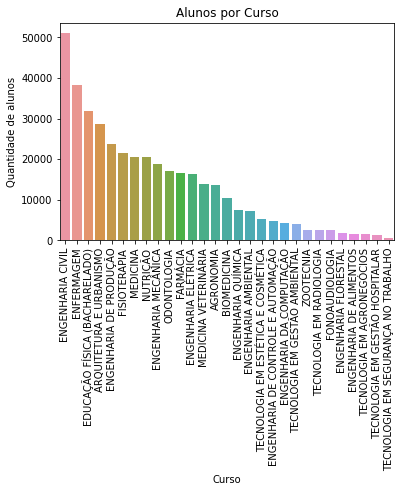

Distribuição percentual dos alunos por curso:


ENGENHARIA CIVIL                       13.079319
ENFERMAGEM                              9.818909
EDUCAÇÃO FÍSICA (BACHARELADO)           8.141541
ARQUITETURA E URBANISMO                 7.350020
ENGENHARIA DE PRODUÇÃO                  6.084817
FISIOTERAPIA                            5.522960
MEDICINA                                5.290733
NUTRIÇÃO                                5.236905
ENGENHARIA MECÂNICA                     4.824228
ODONTOLOGIA                             4.372076
FARMÁCIA                                4.264934
ENGENHARIA ELÉTRICA                     4.186756
MEDICINA VETERINÁRIA                    3.524677
AGRONOMIA                               3.499045
BIOMEDICINA                             2.662668
ENGENHARIA QUÍMICA                      1.907801
ENGENHARIA AMBIENTAL                    1.872685
TECNOLOGIA EM ESTÉTICA E COSMÉTICA      1.354659
ENGENHARIA DE CONTROLE E AUTOMAÇÃO      1.209838
ENGENHARIA DA COMPUTAÇÃO                1.078857
TECNOLOGIA EM GESTÃO

In [68]:
# Análise das variáveis categóricas 
## Distribuição dos Alunos por curso:
sns.countplot(data_new['CO_GRUPO'],order = data_new['CO_GRUPO'].value_counts().index)
plt.title('Alunos por Curso')
plt.xlabel('Curso')
plt.xticks(rotation=90)
plt.ylabel('Quantidade de alunos')
plt.show()
print('Distribuição percentual dos alunos por curso:')
data_new['CO_GRUPO'].value_counts()/data_new.shape[0]*100


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


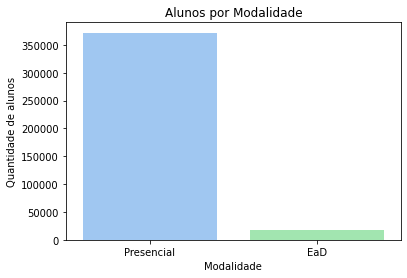

Distribuição percentual dos alunos por modalidade:


Presencial    95.341356
EaD            4.658644
Name: CO_MODALIDADE, dtype: float64

In [70]:
## Distribuição dos Alunos por modalidade:
sns.countplot(data_new['CO_MODALIDADE'],order = data_new['CO_MODALIDADE'].value_counts().index)
plt.title('Alunos por Modalidade')
plt.xlabel('Modalidade')
plt.ylabel('Quantidade de alunos')
plt.show()
print('Distribuição percentual dos alunos por modalidade:')
data_new['CO_MODALIDADE'].value_counts()/data_new.shape[0]*100

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


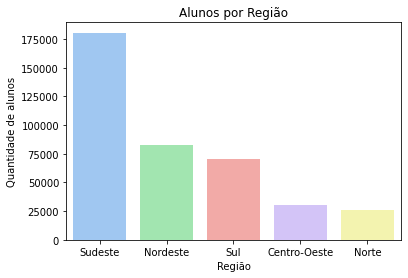

Distribuição percentual dos alunos por região:


Sudeste         46.268343
Nordeste        21.260333
Sul             17.941225
Centro-Oeste     7.886757
Norte            6.643341
Name: CO_REGIAO_CURSO, dtype: float64

In [71]:
## Distribuição dos Alunos por região:
sns.countplot(data_new['CO_REGIAO_CURSO'],order = data_new['CO_REGIAO_CURSO'].value_counts().index)
plt.title('Alunos por Região')
plt.xlabel('Região')
plt.ylabel('Quantidade de alunos')
plt.show()
print('Distribuição percentual dos alunos por região:')
data_new['CO_REGIAO_CURSO'].value_counts()/data_new.shape[0]*100

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


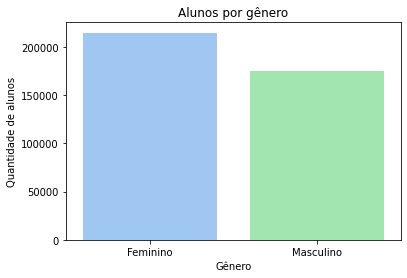

Distribuição percentual dos alunos por gênero:


Feminino     55.037615
Masculino    44.962385
Name: TP_SEXO, dtype: float64

In [72]:
## Distribuição dos Alunos por gênero:
sns.countplot(data_new['TP_SEXO'],order = data_new['TP_SEXO'].value_counts().index)
plt.title('Alunos por gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de alunos')
plt.show()
print('Distribuição percentual dos alunos por gênero:')
data_new['TP_SEXO'].value_counts()/data_new.shape[0]*100

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


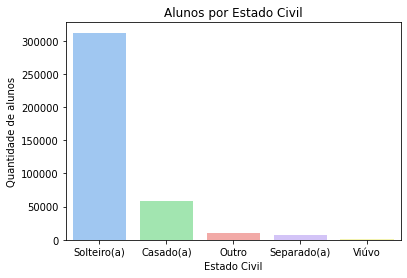

Distribuição percentual dos alunos por estado civil:


Solteiro(a)    80.030246
Casado(a)      15.146808
Outro           2.469145
Separado(a)     2.031348
Viúvo           0.160457
Name: QE_I01, dtype: float64

In [73]:
## Distribuição dos Alunos por estado civil:
sns.countplot(data_new['QE_I01'],order = data_new['QE_I01'].value_counts().index)
plt.title('Alunos por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Quantidade de alunos')
plt.show()
print('Distribuição percentual dos alunos por estado civil:')
data_new['QE_I01'].value_counts()/data_new.shape[0]*100

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


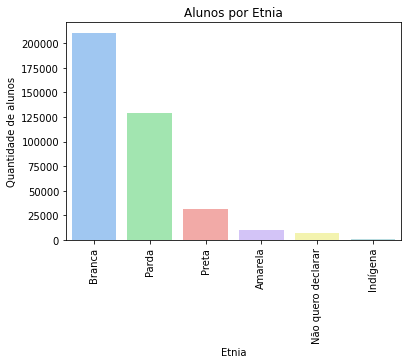

Distribuição percentual dos alunos por etnia:


Branca                54.044113
Parda                 33.206454
Preta                  8.015943
Amarela                2.458892
Não quero declarar     1.799890
Indígena               0.312456
Name: QE_I02, dtype: float64

In [75]:
## Distribuição dos Alunos por etnia:
sns.countplot(data_new['QE_I02'],order = data_new['QE_I02'].value_counts().index)
plt.title('Alunos por Etnia')
plt.xlabel('Etnia')
plt.xticks(rotation=90)
plt.ylabel('Quantidade de alunos')
plt.show()
print('Distribuição percentual dos alunos por etnia:')
data_new['QE_I02'].value_counts()/data_new.shape[0]*100

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


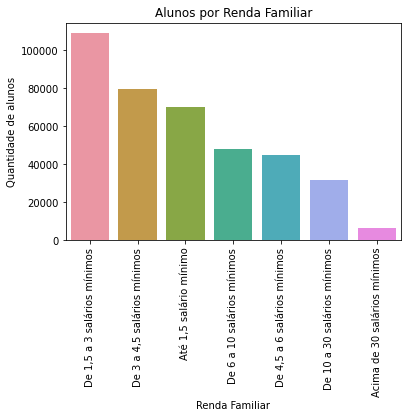

Distribuição percentual dos alunos por renda familiar:


De 1,5 a 3 salários mínimos     27.932382
De 3 a 4,5 salários mínimos     20.352186
Até 1,5 salário mínimo          17.989670
De 6 a 10 salários mínimos      12.278827
De 4,5 a 6 salários mínimos     11.531137
De 10 a 30 salários mínimos      8.122317
Acima de 30 salários mínimos     1.630974
Name: QE_I08, dtype: float64

In [79]:
## Distribuição dos Alunos por rendimento familiar:
sns.countplot(data_new['QE_I08'],order = data_new['QE_I08'].value_counts().index)
plt.title('Alunos por Renda Familiar')
plt.xlabel('Renda Familiar')
plt.xticks(rotation=90)
plt.ylabel('Quantidade de alunos')
plt.show()
print('Distribuição percentual dos alunos por renda familiar:')
data_new['QE_I08'].value_counts()/data_new.shape[0]*100

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


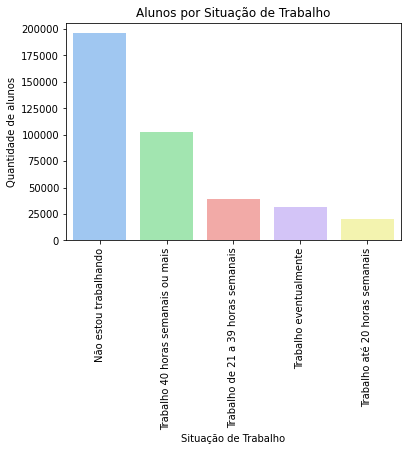

Distribuição percentual dos alunos por situação de trabalho:


Não estou trabalhando                 50.230049
Trabalho 40 horas semanais ou mais    26.359850
Trabalho de 21 a 39 horas semanais     9.967575
Trabalho eventualmente                 8.001333
Trabalho até 20 horas semanais         5.279198
Name: QE_I10, dtype: float64

In [81]:
## Distribuição dos Alunos por situação de trabalho:
sns.countplot(data_new['QE_I10'],order = data_new['QE_I10'].value_counts().index)
plt.title('Alunos por Situação de Trabalho')
plt.xlabel('Situação de Trabalho')
plt.xticks(rotation=90)
plt.ylabel('Quantidade de alunos')
plt.show()
print('Distribuição percentual dos alunos por situação de trabalho:')
data_new['QE_I10'].value_counts()/data_new.shape[0]*100

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


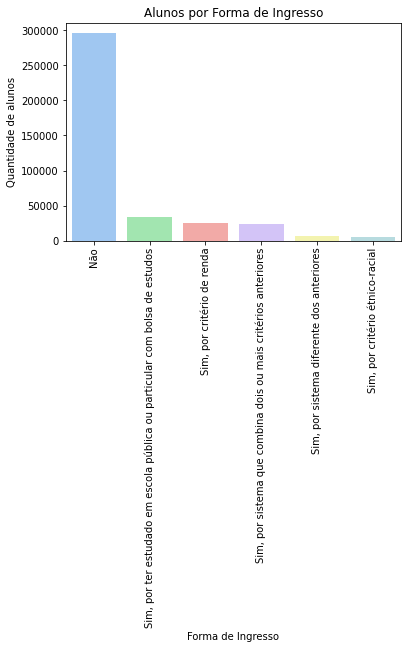

Distribuição percentual dos alunos por forma de ingresso:


Não                                                                           75.781973
Sim, por ter estudado em escola pública ou particular com bolsa de estudos     8.782088
Sim, por critério de renda                                                     6.306279
Sim, por sistema que combina dois ou mais critérios anteriores                 5.930511
Sim, por sistema diferente dos anteriores                                      1.599703
Sim, por critério étnico-racial                                                1.436938
Name: QE_I15, dtype: float64

In [82]:
## Distribuição dos Alunos por forma de ingresso:
sns.countplot(data_new['QE_I15'],order = data_new['QE_I15'].value_counts().index)
plt.title('Alunos por Forma de Ingresso')
plt.xlabel('Forma de Ingresso')
plt.xticks(rotation=90)
plt.ylabel('Quantidade de alunos')
plt.show()
print('Distribuição percentual dos alunos por forma de ingresso:')
data_new['QE_I15'].value_counts()/data_new.shape[0]*100

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


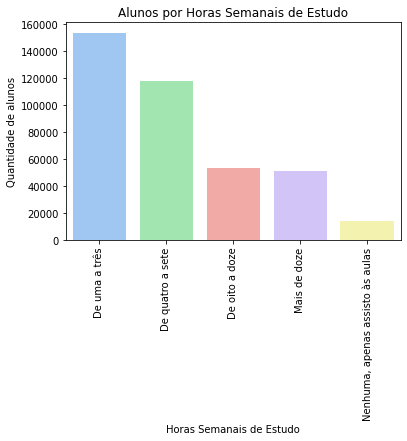

Distribuição percentual dos alunos por horas semanais de estudo:


De uma a três                       39.431735
De quatro a sete                    30.174683
De oito a doze                      13.648096
Mais de doze                        13.059582
Nenhuma, apenas assisto às aulas     3.523139
Name: QE_I23, dtype: float64

In [84]:
## Distribuição dos Alunos por forma de horas semanais de estudo:
sns.countplot(data_new['QE_I23'],order = data_new['QE_I23'].value_counts().index)
plt.title('Alunos por Horas Semanais de Estudo')
plt.xlabel('Horas Semanais de Estudo')
plt.xticks(rotation=90)
plt.ylabel('Quantidade de alunos')
plt.show()
print('Distribuição percentual dos alunos por horas semanais de estudo:')
data_new['QE_I23'].value_counts()/data_new.shape[0]*100

In [96]:
# Análise das variáveis quantitativas
## Análise de estatística descritiva
data_new.describe()

,NU_IDADE,NT_GER,NT_FG,NT_CE
count,390135.000000,390135.000000,390135.000000,390135.000000
mean,27.382542,44.080390,39.838931,45.477586
std,6.369682,14.545807,16.241311,16.646806
min,11.000000,0.000000,0.000000,0.000000
25%,23.000000,33.200000,28.500000,32.900000
50%,25.000000,43.800000,39.300000,45.200000
75%,29.000000,54.800000,51.300000,57.800000
max,86.000000,93.000000,97.800000,100.000000


Text(0.5, 1.0, 'BoxPlot da Idade dos Alunos')

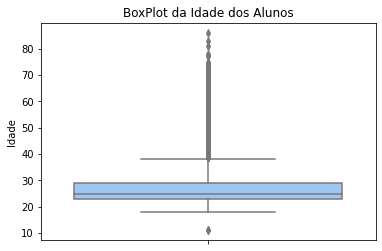

In [98]:
## Boxplot da idade dos alunos
sns.boxplot(y=data_new.NU_IDADE).set(ylabel='Idade')
plt.title('BoxPlot da Idade dos Alunos')

Text(0.5, 1.0, 'BoxPlot da Nota Geral dos Alunos')

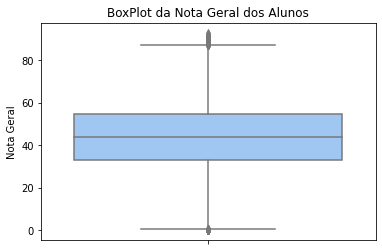

In [99]:
## Boxplot da Nota Geral dos Alunos
sns.boxplot(y=data_new.NT_GER).set(ylabel='Nota Geral')
plt.title('BoxPlot da Nota Geral dos Alunos')

Text(0.5, 1.0, 'BoxPlot da Nota Formação Geral dos Alunos')

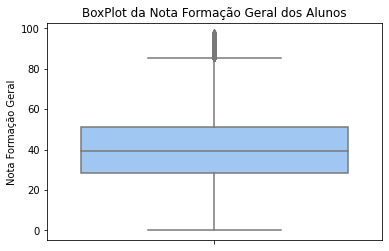

In [100]:
## Boxplot da Nota de Formação Geral dos Alunos
sns.boxplot(y=data_new.NT_FG).set(ylabel='Nota Formação Geral')
plt.title('BoxPlot da Nota Formação Geral dos Alunos')

Text(0.5, 1.0, 'BoxPlot da Nota Componente Específico dos Alunos')

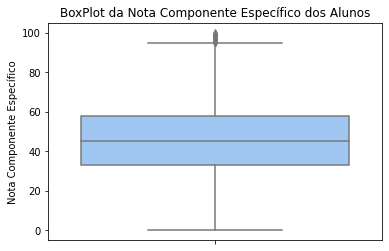

In [101]:
## Boxplot da Nota de Componente Específico dos Alunos
sns.boxplot(y=data_new.NT_CE).set(ylabel='Nota Componente Específico')
plt.title('BoxPlot da Nota Componente Específico dos Alunos')

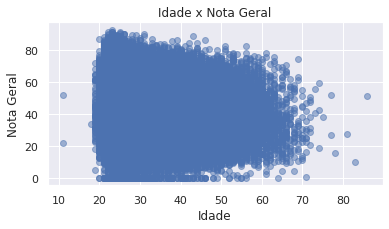

In [109]:
# Análise de Correlação entre as variáveis
## Correlação entre a idade e a Nota Geral
plt.scatter(data_new['NU_IDADE'], data_new['NT_GER'], alpha=0.5)
plt.xlabel("Idade")
plt.ylabel("Nota Geral")
plt.title('Idade x Nota Geral')
plt.show()

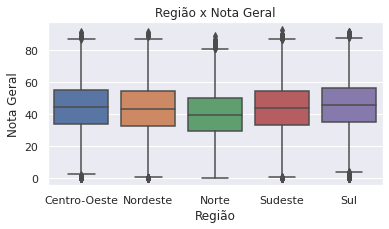

In [110]:
## Correlação entre Região e a Nota Geral
sns.boxplot(x=data_new['CO_REGIAO_CURSO'], y=data_new['NT_GER'])
plt.xlabel('Região')
plt.ylabel('Nota Geral')
plt.title('Região x Nota Geral')
plt.show()

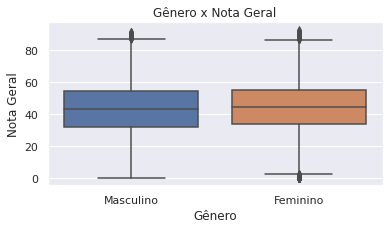

In [111]:
## Correlação entre Gênero e a Nota Geral
sns.boxplot(x=data_new['TP_SEXO'], y=data_new['NT_GER'])
plt.xlabel('Gênero')
plt.ylabel('Nota Geral')
plt.title('Gênero x Nota Geral')
plt.show()

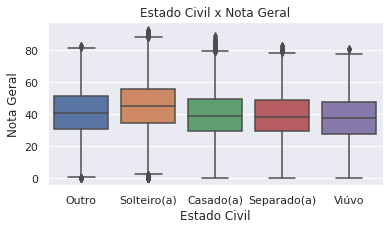

In [112]:
## Correlação entre Estado Civil e a Nota Geral
sns.boxplot(x=data_new['QE_I01'], y=data_new['NT_GER'])
plt.xlabel('Estado Civil')
plt.ylabel('Nota Geral')
plt.title('Estado Civil x Nota Geral')
plt.show()

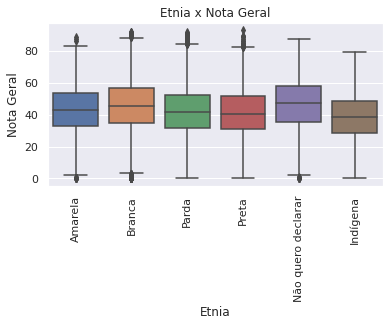

In [116]:
## Correlação entre Etnia e a Nota Geral
sns.boxplot(x=data_new['QE_I02'], y=data_new['NT_GER'])
plt.xlabel('Etnia')
plt.xticks(rotation=90)
plt.ylabel('Nota Geral')
plt.title('Etnia x Nota Geral')
plt.show()

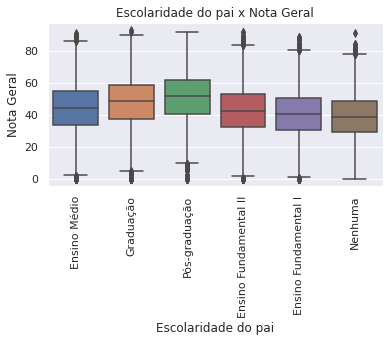

In [122]:
## Correlação entre Escolaridade do Pai e a Nota Geral
sns.boxplot(x=data_new['QE_I04'], y=data_new['NT_GER'])
plt.xlabel('Escolaridade do pai')
plt.xticks(rotation=90)
plt.ylabel('Nota Geral')
plt.title('Escolaridade do pai x Nota Geral')
plt.show()

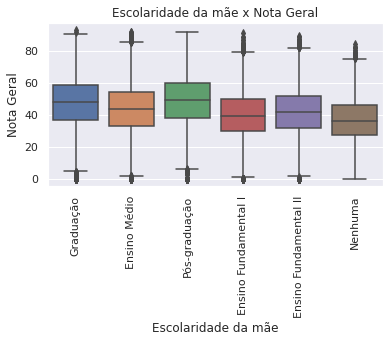

In [123]:
## Correlação entre Escolaridade da Mãe e a Nota Geral
sns.boxplot(x=data_new['QE_I05'], y=data_new['NT_GER'])
plt.xlabel('Escolaridade da mãe')
plt.xticks(rotation=90)
plt.ylabel('Nota Geral')
plt.title('Escolaridade da mãe x Nota Geral')
plt.show()

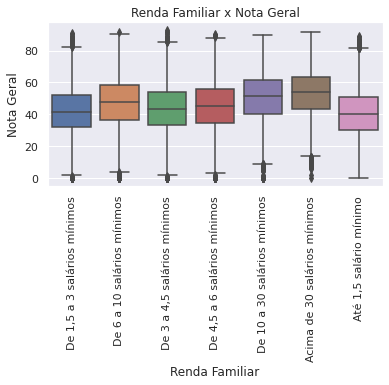

In [124]:
## Correlação entre Renda Familiar e a Nota Geral
sns.boxplot(x=data_new['QE_I08'], y=data_new['NT_GER'])
plt.xlabel('Renda Familiar')
plt.xticks(rotation=90)
plt.ylabel('Nota Geral')
plt.title('Renda Familiar x Nota Geral')
plt.show()

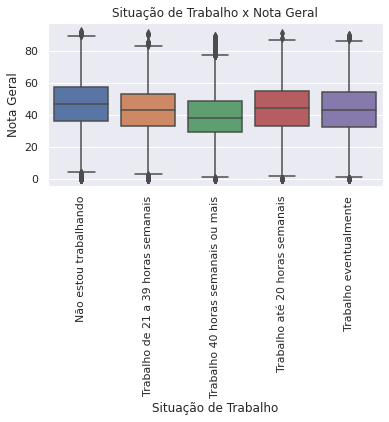

In [125]:
## Correlação entre Situação de Trabalho e a Nota Geral
sns.boxplot(x=data_new['QE_I10'], y=data_new['NT_GER'])
plt.xlabel('Situação de Trabalho')
plt.xticks(rotation=90)
plt.ylabel('Nota Geral')
plt.title('Situação de Trabalho x Nota Geral')
plt.show()

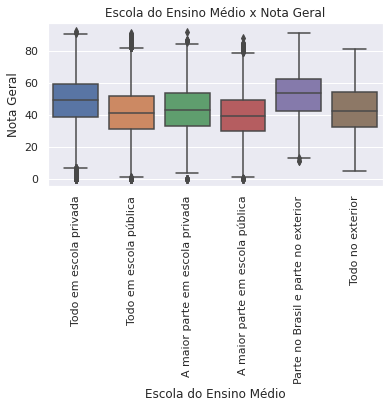

In [126]:
## Correlação entre Escola do Ensino Médio e a Nota Geral
sns.boxplot(x=data_new['QE_I17'], y=data_new['NT_GER'])
plt.xlabel('Escola do Ensino Médio')
plt.xticks(rotation=90)
plt.ylabel('Nota Geral')
plt.title('Escola do Ensino Médio x Nota Geral')
plt.show()

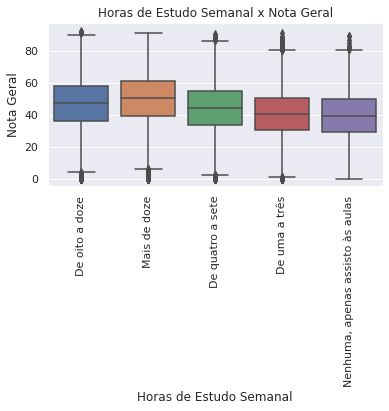

In [127]:
## Correlação entre Horas de Estudo Semanal e a Nota Geral
sns.boxplot(x=data_new['QE_I23'], y=data_new['NT_GER'])
plt.xlabel('Horas de Estudo Semanal')
plt.xticks(rotation=90)
plt.ylabel('Nota Geral')
plt.title('Horas de Estudo Semanal x Nota Geral')
plt.show()